In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')

In [3]:
club_games = pd.read_csv('/Users/alexagliuzza/Desktop/IUM-TWEB/Solution/csv/club_games.csv')

### Step 1: Data Understanding ###
+ Dataframe shape
+ head 
+ dtypes
+ describe

In [4]:
club_games.shape

(130432, 11)

In [5]:
club_games.head(20)

,game_id,club_id,own_goals,own_position,own_manager_name,opponent_id,opponent_goals,opponent_position,opponent_manager_name,hosting,is_win
0,2221751,431,1,NaN,Lutz Göttling,60,2,NaN,Christian Streich,Home,0
1,2221755,83,3,NaN,Ralph Hasenhüttl,4795,0,NaN,Tomas Oral,Home,1
2,2222597,3725,2,2.0,Stanislav Cherchesov,232,1,5.0,Unai Emery,Home,1
3,2222627,2696,0,11.0,Andrey Kobelev,4128,2,10.0,Rustem Khuzin,Home,0
4,2222658,2410,0,2.0,Leonid Slutski,121,2,13.0,Dan Petrescu,Home,0
5,2222664,932,1,5.0,Slaven Bilic,2698,0,8.0,Kurban Berdyev,Home,1
6,2222683,2696,0,11.0,Andrey Kobelev,12438,1,16.0,Gadzhi Gadzhiev,Home,0
7,2222685,2698,0,7.0,Kurban Berdyev,232,1,5.0,Valeriy Karpin,Home,0
8,2222709,3725,2,5.0,Stanislav Cherchesov,11126,1,16.0,Fedor Shcherbachenko,Home,1
9,2222734,1083,2,11.0,Miodrag Bozovic,16704,3,10.0,Slavoljub Muslin,Home,0


In [6]:
club_games.columns

Index(['game_id', 'club_id', 'own_goals', 'own_position', 'own_manager_name',
       'opponent_id', 'opponent_goals', 'opponent_position',
       'opponent_manager_name', 'hosting', 'is_win'],
      dtype='object')

In [7]:
club_games.dtypes

game_id                    int64
club_id                    int64
own_goals                  int64
own_position             float64
own_manager_name          object
opponent_id                int64
opponent_goals             int64
opponent_position        float64
opponent_manager_name     object
hosting                   object
is_win                     int64
dtype: object

In [8]:
club_games.describe()

,game_id,club_id,own_goals,own_position,opponent_id,opponent_goals,opponent_position,is_win
count,1.304320e+05,130432.00000,130432.000000,91524.000000,130432.00000,130432.000000,91524.000000,130432.000000
mean,3.018125e+06,4681.76423,1.457365,9.364910,4681.76423,1.457365,9.364910,0.392703
std,5.605194e+05,10870.32151,1.402178,5.311624,10870.32151,1.402178,5.311624,0.488353
min,2.211607e+06,1.00000,0.000000,1.000000,1.00000,0.000000,1.000000,0.000000
25%,2.518596e+06,354.00000,0.000000,5.000000,354.00000,0.000000,5.000000,0.000000
50%,2.919854e+06,995.00000,1.000000,9.000000,995.00000,1.000000,9.000000,0.000000
75%,3.450800e+06,3060.00000,2.000000,14.000000,3060.00000,2.000000,14.000000,1.000000
max,4.228114e+06,112755.00000,19.000000,21.000000,112755.00000,19.000000,21.000000,1.000000


In [9]:
club_games['hosting'].unique()

array(['Home', 'Away'], dtype=object)

### Definition for all columns ###

+ game_id: A unique identifier for the game.
+ club_id: A unique identifier for each club.
+ own_goals: Number of goals scored by the club.
+ own_position: Position in the league table for the club.
+ own_manager_name: Name of the coach for the club.
+ opponent_id: A unique identifier for each opponent club.
+ opponent_goals: Number of goals scored by the opponent club.
+ opponent_position: Position in the league table for the opponent club.
+ opponent_manager_name: Name of the coach for the opponent club.
+ hosting: String value indicating whether the club is playing at home or away.
+ is_win: Indicates whether the club won, verified by the number of goals scored by either club.

### Step 2: Data Preperation ###
+ Dropping irrelevant columns and rows (NaN)
+ Identifying duplicated columns
+ Feature Creation

In [10]:
club_games.isna().sum() #check null values

game_id                      0
club_id                      0
own_goals                    0
own_position             38908
own_manager_name          1484
opponent_id                  0
opponent_goals               0
opponent_position        38908
opponent_manager_name     1484
hosting                      0
is_win                       0
dtype: int64

In [11]:
club_games.duplicated().sum() #there isn't complete row duplicate

0

In [12]:
club_games['game_id'].duplicated().sum() #Games are duplicates, simply the club becomes the opponent and vice versa. For our analysis we can remove them because they duplicate information from a different view

65216

In [13]:
club_games['game_id'].value_counts()

game_id
2221751    2
3496493    2
3487178    2
3487488    2
3487493    2
          ..
2728521    2
2728522    2
2728527    2
2728548    2
4171248    2
Name: count, Length: 65216, dtype: int64

In [14]:
club_games.loc[club_games['game_id' ] == 2221751]

,game_id,club_id,own_goals,own_position,own_manager_name,opponent_id,opponent_goals,opponent_position,opponent_manager_name,hosting,is_win
0,2221751,431,1,NaN,Lutz Göttling,60,2,NaN,Christian Streich,Home,0
65216,2221751,60,2,NaN,Christian Streich,431,1,NaN,Lutz Göttling,Away,1


In [15]:
manager_nan = club_games.loc[club_games['own_manager_name'].isna()] 
manager_nan['game_id'].duplicated().sum()  

742

In [16]:
test = club_games.loc[club_games['game_id'].duplicated()]
test.loc[test['own_manager_name'].isna()]

,game_id,club_id,own_goals,own_position,own_manager_name,opponent_id,opponent_goals,opponent_position,opponent_manager_name,hosting,is_win
65481,2258371,317,1,NaN,NaN,17797,0,NaN,NaN,Away,1
65541,2289248,2079,0,14.0,NaN,3060,0,4.0,NaN,Away,0
65545,2289291,6676,2,2.0,NaN,3060,0,4.0,NaN,Away,1
65815,2366500,22235,0,NaN,NaN,20417,5,NaN,NaN,Away,0
65817,2366512,369,5,NaN,NaN,24391,0,NaN,NaN,Away,1
...,...,...,...,...,...,...,...,...,...,...,...
130057,4072488,36,3,3.0,NaN,7775,0,19.0,NaN,Away,1
130058,4072493,7775,0,19.0,NaN,589,3,12.0,NaN,Away,0
130095,4157243,5091,7,NaN,NaN,77305,0,NaN,NaN,Away,1
130193,4115648,5792,4,NaN,NaN,13457,0,NaN,NaN,Away,1


In [17]:
club_games.loc[club_games['game_id'] == 2258371]

,game_id,club_id,own_goals,own_position,own_manager_name,opponent_id,opponent_goals,opponent_position,opponent_manager_name,hosting,is_win
265,2258371,17797,0,NaN,NaN,317,1,NaN,NaN,Home,0
65481,2258371,317,1,NaN,NaN,17797,0,NaN,NaN,Away,1


In [18]:
new_club_games = club_games.copy()

In [19]:
new_club_games = new_club_games.drop_duplicates('game_id')
new_club_games.shape

(65216, 11)

In [20]:
new_club_games['club_id'].unique() #it seems there are so many games of the same clubs

array([   431,     83,   3725, ...,    834, 111469, 105584])

In [21]:
new_club_games['club_id'].duplicated().sum()

62812

In [22]:
new_club_games.duplicated(subset=['club_id', 'own_manager_name']).sum()

56752

In [23]:
new_club_games.duplicated(subset=['opponent_id', 'opponent_manager_name']).sum()

57028

In [24]:
new_club_games['own_manager_name'].isna().sum()

742

In [25]:
new_club_games['opponent_manager_name'].isna().sum()

742

In [26]:
new_club_games['own_position'].isna().sum()

19454

In [27]:
new_club_games['opponent_position'].isna().sum()

19454

In [28]:
new_club_games['own_manager_name'].fillna(' ', inplace=True)
new_club_games['opponent_manager_name'].fillna(' ', inplace=True)
new_club_games.isna().sum()

game_id                      0
club_id                      0
own_goals                    0
own_position             19454
own_manager_name             0
opponent_id                  0
opponent_goals               0
opponent_position        19454
opponent_manager_name        0
hosting                      0
is_win                       0
dtype: int64

In [29]:
rows_two_duplicate = new_club_games.loc[(new_club_games['opponent_position'].isnull()) & (new_club_games['own_position'].isnull())]
rows_two_duplicate = rows_two_duplicate.shape[0]
print(rows_two_duplicate)


19454


In [30]:
club_games_with_position = new_club_games.loc[~((new_club_games['opponent_position'].isnull()) & (new_club_games['own_position'].isnull()))] #get only games where we know position for making graph on position

In [31]:
club_games_with_position.shape

(45762, 11)

In [32]:
club_games_with_position.isna().sum()

game_id                  0
club_id                  0
own_goals                0
own_position             0
own_manager_name         0
opponent_id              0
opponent_goals           0
opponent_position        0
opponent_manager_name    0
hosting                  0
is_win                   0
dtype: int64

In [33]:
club_games_with_position['club_id'].unique() 

array([ 3725,  2696,  2410,   932,  2698,  1083,  2700, 16704,  6414,
         660,  6992,  6996,  2227,  6994,  2740,  3592,   339,  2783,
        1082,  1159,   583,   273,    40,   595,  1421,   969, 14171,
        3911,  1158,   750,  1041,   415,   618,  1147,  1095,   417,
         173,  3426,  1177,  5724,   678,   190,   865,  2778,   206,
        2414,  5817,   498,   204,   172,   157, 28643,  2727,   354,
         180,   512,   931,   405,   379,   984,   289,   631,  1032,
        1123,    11,   281,  2578,   903,   371,   370,    43,  2553,
        2759,   465,  1411,   762,    15,    24,     4,    79,    82,
          86,    38,    60,    41,    18,    16,  2420,   294,  2425,
        2424,   720,   979,  1075,  1301,   714,   897, 16795,   366,
        3709,   681,  1049,   418,   368,  3368,   621,   237,  1084,
        3205,   524,  6890,  2323,   589,   114,   820,  3216,  2292,
       10484,    20,  2381,   449,   142,   192,   317,   200,   235,
         383,   202,

### Step 3: Feature Understanding ###
+ My questions
       + How are the values distributed? Are there any outliers?
       + Who are the 5 managers with the most wins at home? And outside the house?
       + Which are the 5 clubs with the most home wins and which clubs outside? Who won the most?
       + Do clubs win more by ranking?
       + Where is correlation between columns?
+ Plotting Feature Distributions
       + Histogram
       + Bar Chart
       + Boxplot
       + Scatterplot
       + HeatMap

Text(0, 0.5, 'frequency')

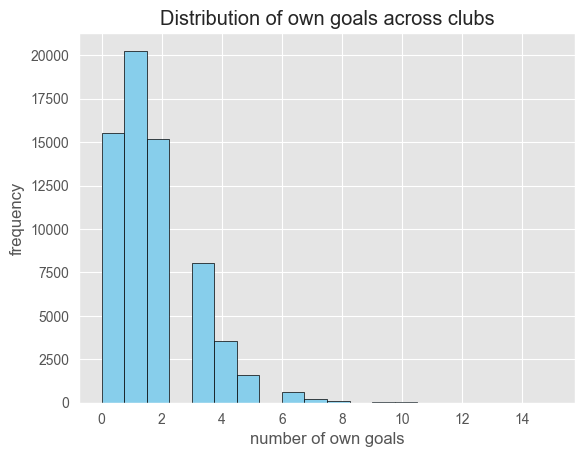

In [34]:
ax = new_club_games['own_goals'].plot(kind='hist',
                             bins= 20,
                             title = 'Distribution of own goals across club games with position or not',
                             color = 'skyblue',
                             edgecolor='black')
ax.set_xlabel('number of own goals')
ax.set_ylabel('frequency')

<Axes: ylabel='own_goals'>

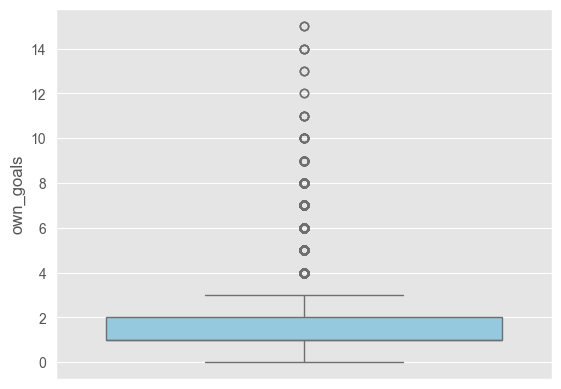

In [35]:
sns.boxplot(data = new_club_games['own_goals'],
            color = 'skyblue') #it seems that there are some outliers clubs that have scored so many goals in a game 

In [36]:
new_club_games.sort_values(by='own_goals').tail(10) #these club games are really strange, maybe friendly, but these club id doesn't exist in clubs table

,game_id,club_id,own_goals,own_position,own_manager_name,opponent_id,opponent_goals,opponent_position,opponent_manager_name,hosting,is_win
11352,3605479,55591,13,NaN,Alexandru Curtianu,12049,12,NaN,Maksim Shvetsov,Home,1
27014,3252856,817,13,NaN,John Karelse,11312,12,NaN,Gert Jan Karsten,Home,1
40146,4089276,9026,14,NaN,Warren Feeney,32768,15,NaN,Darren Abdilla,Home,0
25196,2516541,5548,14,NaN,Carl Heeley,2964,15,NaN,Mark Robins,Home,0
39220,3424074,3258,14,NaN,Stephen Bradley,3189,13,NaN,Jarkko Wiss,Home,1
63270,3288673,3723,14,NaN,Sergey Mashnin,3834,15,NaN,Igor Chugaynov,Home,0
20756,2367603,993,14,NaN,Pablo Villanueva,897,15,NaN,Fernando Vázquez,Home,0
33236,2508630,3033,15,NaN,Stuart McLaren,8929,14,NaN,Darren Henderson,Home,1
45601,2599284,4084,15,NaN,Roberto Venturato,7197,0,NaN,Vittorio Belotti,Home,1
63474,3430989,33429,15,NaN,Kevin Hollander,33424,16,NaN,Ted Verdonkschot,Home,0


Text(0, 0.5, 'frequency')

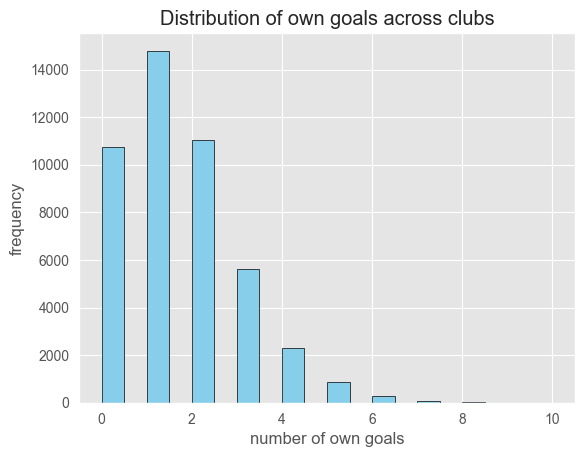

In [37]:
ax = club_games_with_position['own_goals'].plot(kind='hist',
                             bins= 20,
                             title = 'Distribution of own goals across club games only with position',
                             color = 'skyblue',
                             edgecolor='black')
ax.set_xlabel('number of own goals')
ax.set_ylabel('frequency')

<Axes: ylabel='own_goals'>

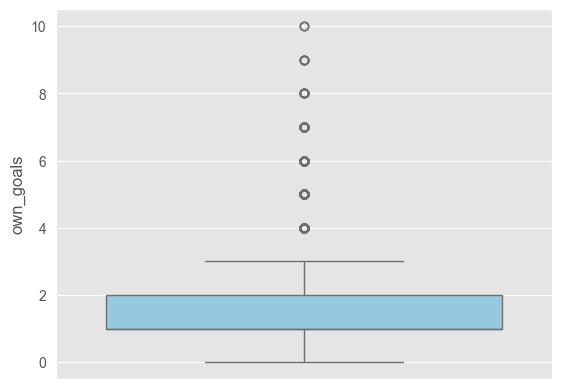

In [42]:
sns.boxplot(data = club_games_with_position['own_goals'],
            color = 'skyblue')

In [38]:
club_games_with_position.sort_values(by='own_goals').tail(10) #more realistic game

,game_id,club_id,own_goals,own_position,own_manager_name,opponent_id,opponent_goals,opponent_position,opponent_manager_name,hosting,is_win
7635,3837849,31,9,9.0,Jürgen Klopp,989,0,17.0,Scott Parker,Home,1
7330,3597816,610,9,1.0,Erik ten Hag,133,0,11.0,Henk de Jong,Home,1
1250,2602706,4482,9,12.0,Vitaliy Kvartsyanyi,6994,1,13.0,Anatoliy Chantsev,Home,1
59400,3429707,985,9,2.0,Ole Gunnar Solskjaer,180,0,13.0,Ralph Hasenhüttl,Home,1
44487,2231620,27,9,1.0,Jupp Heynckes,41,2,9.0,Thorsten Fink,Home,1
45154,2475468,418,9,2.0,Carlo Ancelotti,16795,1,19.0,Abel Resino,Home,1
465,2335726,338,9,6.0,Oleg Blokhin,2783,1,11.0,Sergey Tashuev,Home,1
39084,3298478,41231,10,10.0,Vladimir Fedotov,1083,1,4.0,Valeriy Karpin,Home,1
61650,2594621,418,10,3.0,Rafael Benítez,367,2,18.0,Paco Jémez,Home,1
10259,3069587,294,10,2.0,Bruno Lage,982,0,15.0,Costinha,Home,1


In [41]:
club_games_with_position['club_id'].value_counts() #length = 426, 426 are clubs in the clubs table so there is probably some inconsistent information with particularly strange data, so I decided to directly analyze the clubs with the known position

club_id
631      216
681      216
11       216
985      216
29       216
        ... 
53646      6
3209       6
152        6
2431       6
3385       4
Name: count, Length: 426, dtype: int64

Text(0, 0.5, 'frequency')

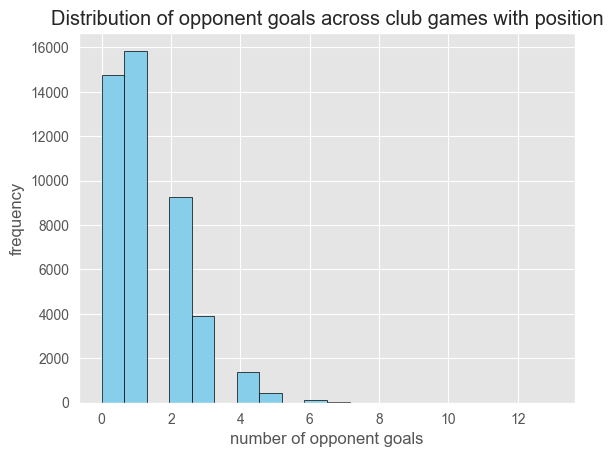

In [43]:
ax = club_games_with_position['opponent_goals'].plot(kind='hist',
                                                bins=20,
                                                title='Distribution of opponent goals across club games with position',
                                                color='skyblue',
                                                edgecolor='black')
ax.set_xlabel('number of opponent goals')
ax.set_ylabel('frequency')

<Axes: ylabel='opponent_goals'>

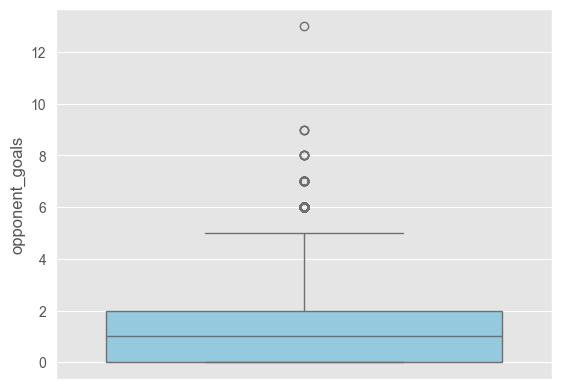

In [44]:
sns.boxplot(data=club_games_with_position['opponent_goals'],
            color='skyblue')

In [45]:
club_games_with_position.sort_values(by='opponent_goals').tail(10)  #are most likely realistic

,game_id,club_id,own_goals,own_position,own_manager_name,opponent_id,opponent_goals,opponent_position,opponent_manager_name,hosting,is_win
16480,2321184,86,0,14.0,Robin Dutt,27,7,1.0,Pep Guardiola,Home,0
33065,2475524,993,0,20.0,José Antonio Romero,131,8,1.0,Luis Enrique,Home,0
25394,2594804,897,0,14.0,Víctor Sánchez,131,8,1.0,Luis Enrique,Home,0
8792,2475215,897,2,14.0,Víctor Fernández,418,8,7.0,Carlo Ancelotti,Home,0
56267,4095071,350,0,19.0,Paul Heckingbottom,762,8,8.0,Eddie Howe,Home,0
38046,2865125,132,0,17.0,Stijn Vreven,610,8,2.0,Marcel Keizer,Home,0
26895,3219379,180,0,18.0,Ralph Hasenhüttl,1003,9,3.0,Brendan Rodgers,Home,0
57641,2609762,1095,0,20.0,Mohamed Bradja,583,9,1.0,Laurent Blanc,Home,0
48141,3890054,1519,0,12.0,Jack Ross,371,9,1.0,Ange Postecoglou,Home,0
35282,3450515,1426,0,14.0,Hans de Koning,610,13,1.0,Erik ten Hag,Home,0


Text(0, 0.5, 'frequency')

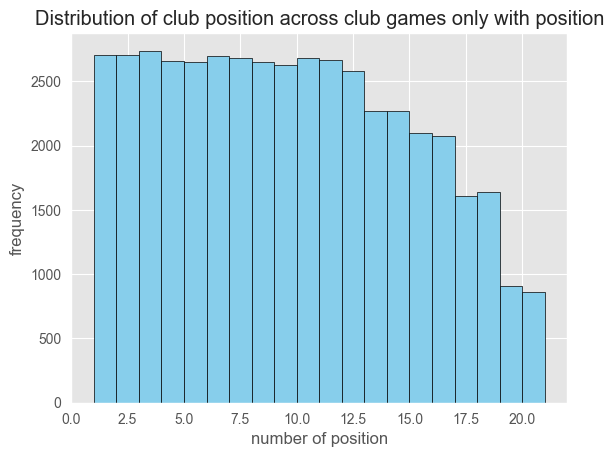

In [55]:
ax = club_games_with_position['own_position'].plot(kind='hist',
                             bins= 20,
                             title = 'Distribution of club position across club games only with position',
                             color = 'skyblue',
                             edgecolor='black')
ax.set_xlabel('number of position')
ax.set_ylabel('frequency')

<Axes: ylabel='own_position'>

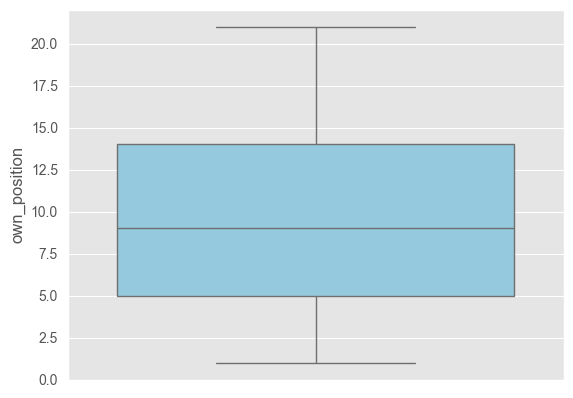

In [48]:
sns.boxplot(data=club_games_with_position['own_position'],
            color='skyblue') #no outliers

In [51]:
club_games_with_position.sort_values(by='own_position').head(5) 

,game_id,club_id,own_goals,own_position,own_manager_name,opponent_id,opponent_goals,opponent_position,opponent_manager_name,hosting,is_win
55753,3613079,449,2,1.0,Abdullah Avci,2293,1,2.0,Ilhan Palut,Home,1
17392,2613548,336,3,1.0,Jorge Jesus,2990,2,17.0,Filipe Gouveia,Home,1
17372,2609687,583,5,1.0,Laurent Blanc,1420,1,5.0,Stéphane Moulin,Home,1
17369,2609452,336,2,1.0,Jorge Jesus,720,0,2.0,Julen Lopetegui,Home,1
58012,2732180,3508,2,1.0,Francky Dury,498,0,12.0,Georges Leekens,Home,1


In [49]:
club_games_with_position.sort_values(by='own_position').tail(5) 

,game_id,club_id,own_goals,own_position,own_manager_name,opponent_id,opponent_goals,opponent_position,opponent_manager_name,hosting,is_win
43287,3426943,3205,0,21.0,Samet Aybaba,114,2,1.0,Sergen Yalcin,Home,0
15043,3427196,833,1,21.0,Ali Tandogan,141,4,2.0,Fatih Terim,Home,0
47317,3426694,6890,0,21.0,Okan Buruk,1467,0,8.0,Ilhan Palut,Home,0
31130,3426960,39722,0,21.0,Mesut Bakkal,36,3,2.0,Erol Bulut,Home,0
39232,3426975,833,0,21.0,Yalcin Kosukavak,7775,2,5.0,Ömer Erdogan,Home,0


In [52]:
club_games_with_position['own_position'].mean()

9.273043136226564

Text(0, 0.5, 'frequency')

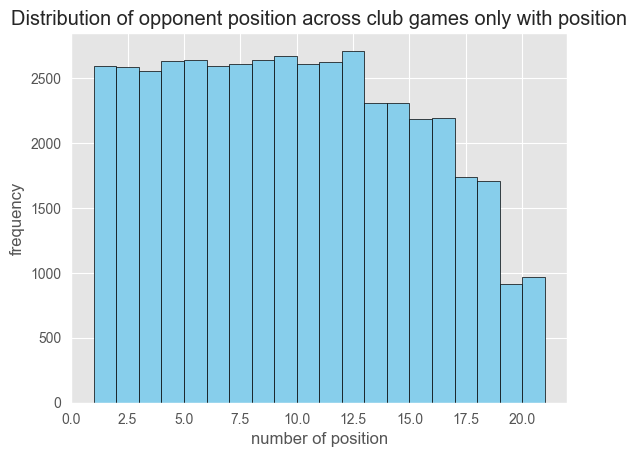

In [47]:
ax = club_games_with_position['opponent_position'].plot(kind='hist',
                             bins= 20,
                             title = 'Distribution of opponent position across club games only with position',
                             color = 'skyblue',
                             edgecolor='black')
ax.set_xlabel('number of position')
ax.set_ylabel('frequency')

<Axes: ylabel='opponent_position'>

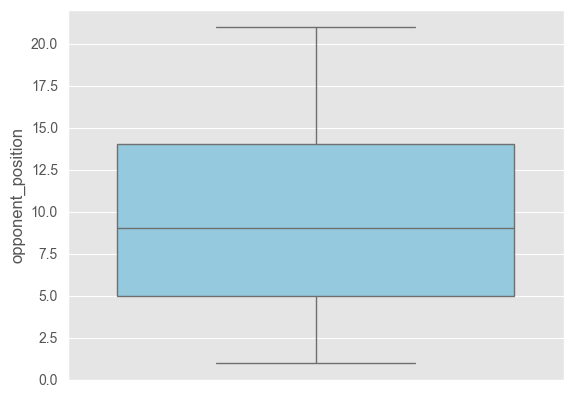

In [56]:
sns.boxplot(data=club_games_with_position['opponent_position'],
            color='skyblue') #no outliers

In [57]:
club_games_with_position.sort_values(by='opponent_position').head(5) 

,game_id,club_id,own_goals,own_position,own_manager_name,opponent_id,opponent_goals,opponent_position,opponent_manager_name,hosting,is_win
16591,2340249,8024,1,12.0,Pedro Emanuel,720,3,1.0,Paulo Fonseca,Home,0
47948,3839025,24,1,18.0,Oliver Glasner,27,6,1.0,Julian Nagelsmann,Home,0
24695,2341209,3709,2,8.0,Luis García,131,5,1.0,Gerardo Martino,Home,0
45172,2478702,398,0,6.0,Stefano Pioli,506,3,1.0,Massimiliano Allegri,Home,0
47945,3838751,405,2,11.0,Unai Emery,11,4,1.0,Mikel Arteta,Home,0


In [58]:
club_games_with_position.sort_values(by='opponent_position').tail(5) 

,game_id,club_id,own_goals,own_position,own_manager_name,opponent_id,opponent_goals,opponent_position,opponent_manager_name,hosting,is_win
31126,3426933,820,3,17.0,Mustafa Kaplan,3205,2,21.0,Samet Aybaba,Home,1
59389,3427038,2293,2,13.0,Ilhan Palut,833,0,21.0,Hakan Kutlu,Home,1
31142,3427108,36,1,2.0,Emre Belözoglu,833,0,21.0,Hakan Kutlu,Home,1
35203,3427087,36,1,3.0,Erol Bulut,820,2,21.0,Özcan Bizati,Home,0
43295,3427049,833,1,19.0,Hakan Kutlu,820,0,21.0,Mehmet Altiparmak,Home,1


In [59]:
club_games_with_position['opponent_position'].mean()

9.456776364669377

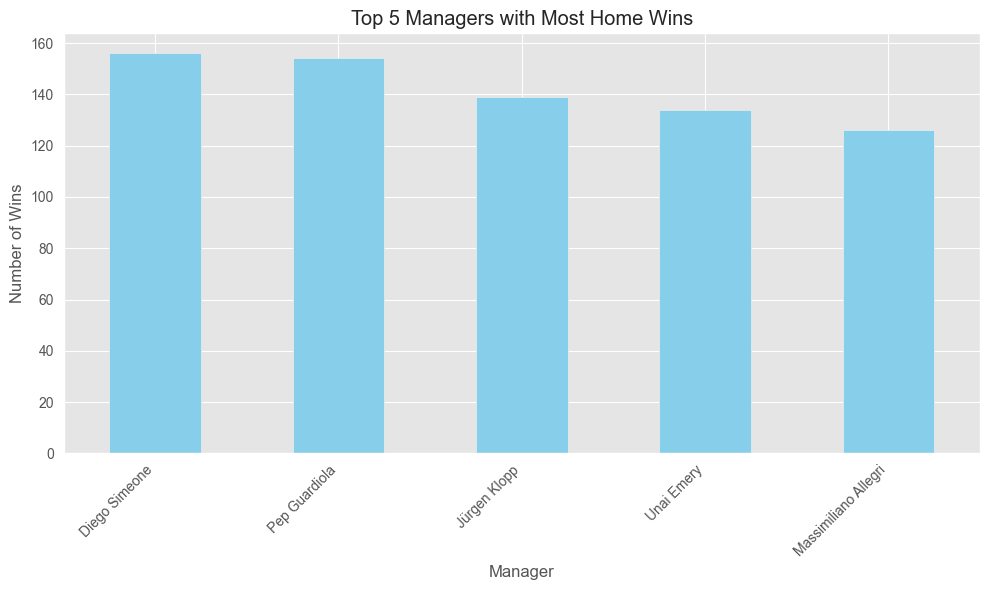

In [73]:
home_wins = club_games_with_position[club_games_with_position['hosting'] == 'Home']
home_wins_count = home_wins[home_wins['is_win'] == 1].groupby('own_manager_name').size().sort_values(ascending=False).head(5)

# Plot the bar chart for home wins

home_wins_count.plot(kind='bar',
                     color='skyblue',
                     title ='Top 5 Managers with Most Home Wins', 
                     figsize = (10,6),
                     xlabel = 'Manager',
                     ylabel ='Number of Wins',
                     edgecolor='black')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

In [83]:
club_games_with_position['hosting'].value_counts() #need to take Home, is_win == 0, group by opponent manager

hosting
Home    45762
Name: count, dtype: int64

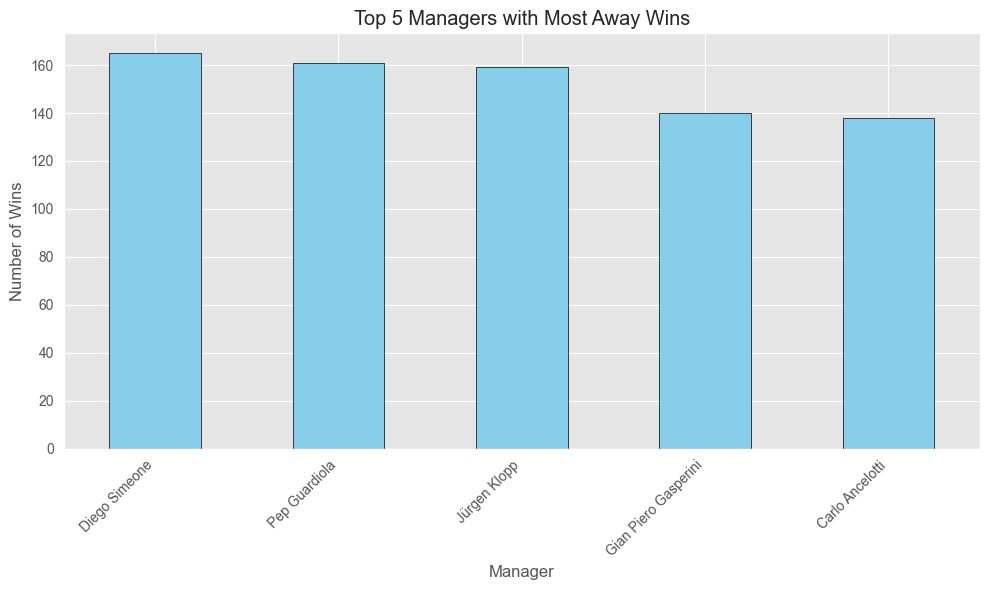

In [89]:
away_wins = club_games_with_position[club_games_with_position['hosting'] == 'Home']
away_wins_count = away_wins[away_wins['is_win'] == 0].groupby('opponent_manager_name').size().sort_values(ascending=False).head(5)

# Plot the bar chart for home wins

away_wins_count.plot(kind='bar',
                     color='skyblue',
                     title ='Top 5 Managers with Most Away Wins', 
                     figsize = (10,6),
                     xlabel = 'Manager',
                     ylabel ='Number of Wins',
                     edgecolor='black')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

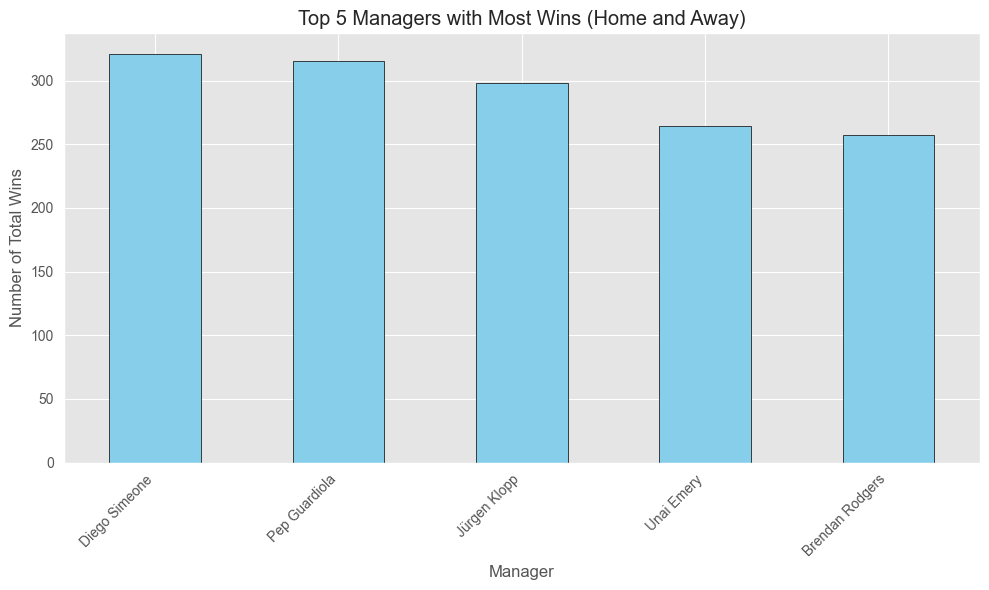

In [90]:
# Calculate total wins for each manager at home
home_matches = club_games_with_position[club_games_with_position['hosting'] == 'Home']
home_wins_count = home_matches[home_matches['is_win'] == 1].groupby('own_manager_name').size().sort_values(ascending=False)

# Calculate total wins for each manager away
away_matches = club_games_with_position[club_games_with_position['hosting'] == 'Home']
away_wins_count = away_matches[away_matches['is_win'] == 0].groupby('opponent_manager_name').size().sort_values(ascending=False)

# Combine home and away wins for each manager
total_wins = home_wins_count.add(away_wins_count, fill_value=0).sort_values(ascending=False)

total_wins.head(5).plot(kind = 'bar', 
                        color = 'skyblue', 
                        figsize = (10,6),
                        title = 'Top 5 Managers with Most Wins (Home and Away)',
                        xlabel = 'Manager',
                        ylabel = 'Number of Total Wins',
                        edgecolor = 'black')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

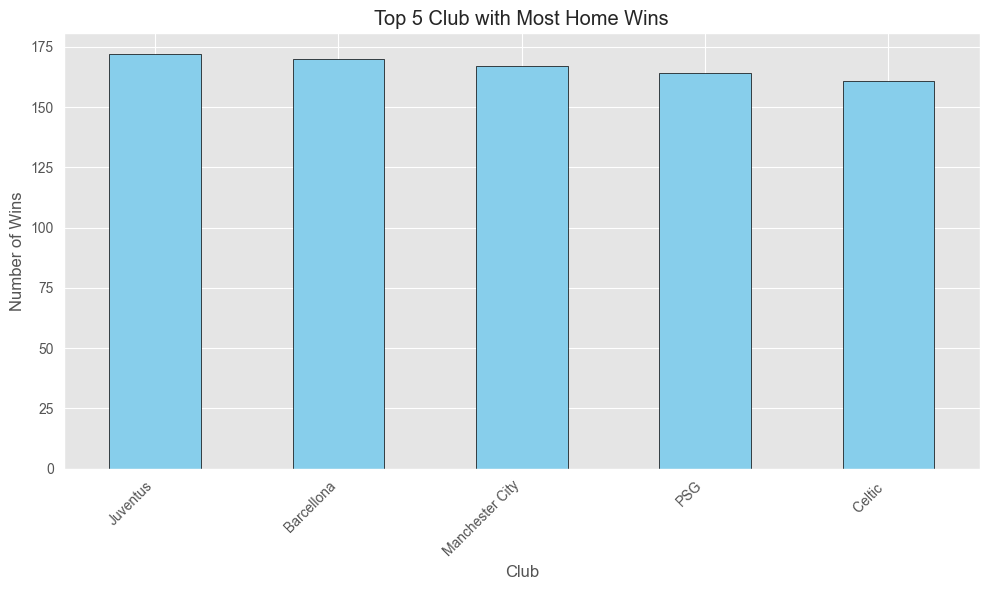

In [93]:
home_wins = club_games_with_position[club_games_with_position['hosting'] == 'Home']
home_wins_count = home_wins[home_wins['is_win'] == 1].groupby('club_id').size().sort_values(ascending=False).head(5)

# Plot the bar chart for home wins
id_to_name = {
    506: 'Juventus',
    131: 'Barcellona',
    281: 'Manchester City',
    583: 'PSG',
    371: 'Celtic ',
}

home_wins_count.index = home_wins_count.index.map(id_to_name)
home_wins_count.plot(kind='bar',
                     color='skyblue',
                     title ='Top 5 Club with Most Home Wins', 
                     figsize = (10,6),
                     xlabel = 'Club',
                     ylabel ='Number of Wins',
                     edgecolor='black')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

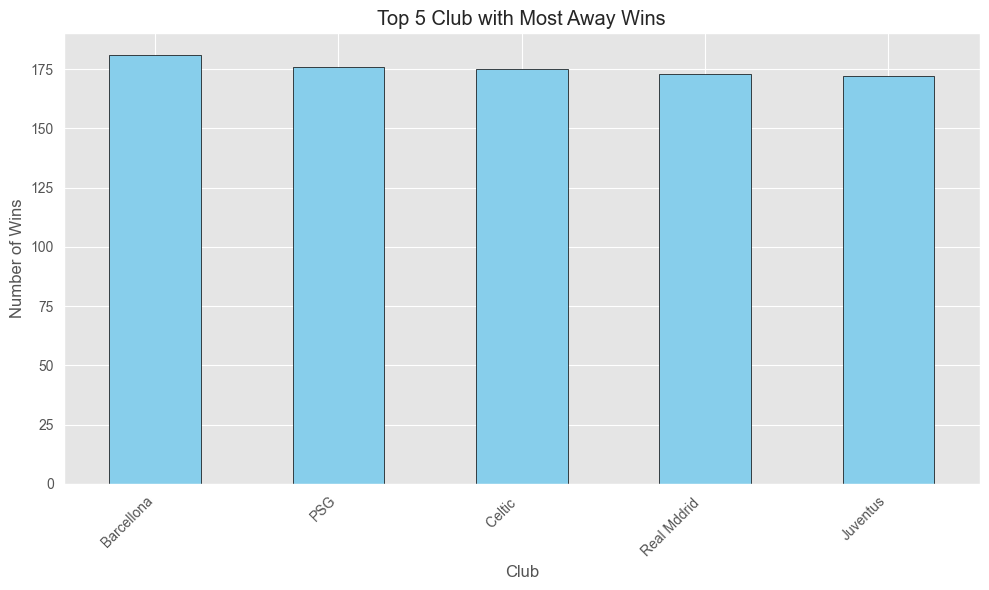

In [95]:
away_wins = club_games_with_position[club_games_with_position['hosting'] == 'Home']
away_wins_count = away_wins[away_wins['is_win'] == 0].groupby('opponent_id').size().sort_values(ascending=False).head(5)
# Plot the bar chart for home wins
id_to_name = {
    506: 'Juventus',
    131: 'Barcellona',
    418: 'Real Mddrid ',
    583: 'PSG',
    371: 'Celtic ',
}

away_wins_count.index = away_wins_count.index.map(id_to_name)

away_wins_count.plot(kind='bar',
                     color='skyblue',
                     title ='Top 5 Club with Most Away Wins', 
                     figsize = (10,6),
                     xlabel = 'Club',
                     ylabel ='Number of Wins',
                     edgecolor='black')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

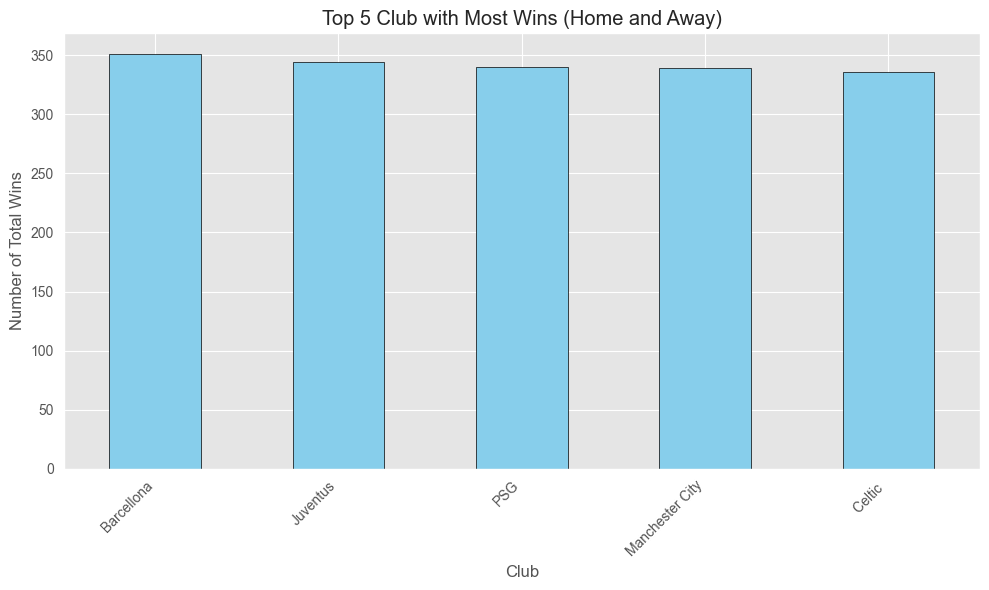

In [97]:
# Calculate total wins for each manager at home
home_matches = club_games_with_position[club_games_with_position['hosting'] == 'Home']
home_wins_count = home_matches[home_matches['is_win'] == 1].groupby('club_id').size().sort_values(ascending=False)

# Calculate total wins for each manager away
away_matches = club_games_with_position[club_games_with_position['hosting'] == 'Home']
away_wins_count = away_matches[away_matches['is_win'] == 0].groupby('opponent_id').size().sort_values(ascending=False)

# Combine home and away wins for each manager
total_wins = home_wins_count.add(away_wins_count, fill_value=0).sort_values(ascending=False)
id_to_name = {
    506: 'Juventus',
    131: 'Barcellona',
    281: 'Manchester City',
    583: 'PSG',
    371: 'Celtic ',
}

total_wins.index = total_wins.index.map(id_to_name)

total_wins.head(5).plot(kind = 'bar', 
                        color = 'skyblue', 
                        figsize = (10,6),
                        title = 'Top 5 Club with Most Wins (Home and Away)',
                        xlabel = 'Club',
                        ylabel = 'Number of Total Wins',
                        edgecolor = 'black')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

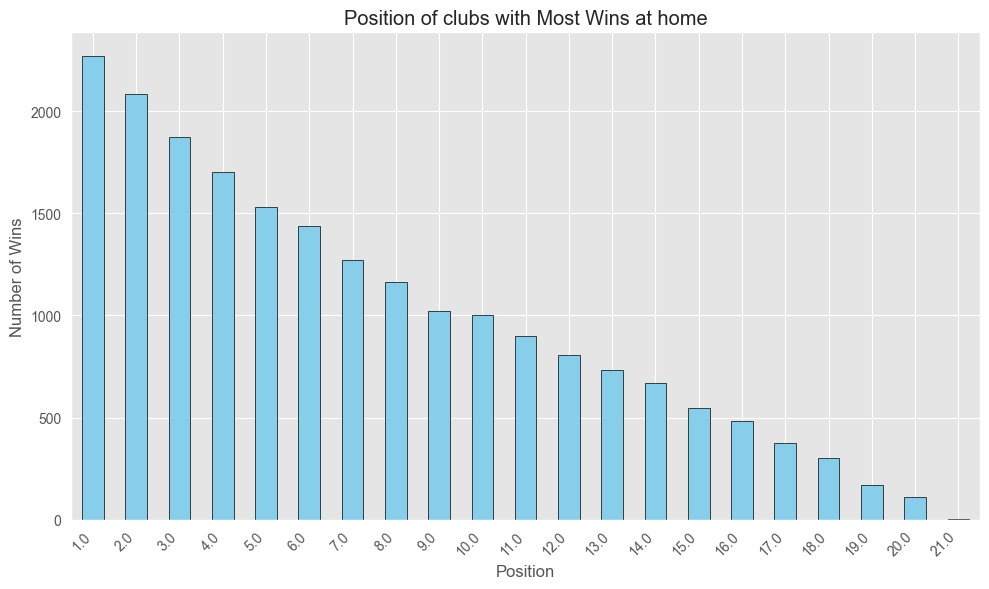

In [103]:
home_wins = club_games_with_position[club_games_with_position['hosting'] == 'Home']
home_wins_count = home_wins[home_wins['is_win'] == 1].groupby('own_position').size().sort_values(ascending=False)

home_wins_count.plot(kind='bar',
                     color='skyblue',
                     title ='Position of clubs with Most Wins at home', 
                     figsize = (10,6),
                     xlabel = 'Position',
                     ylabel ='Number of Wins',
                     edgecolor='black')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

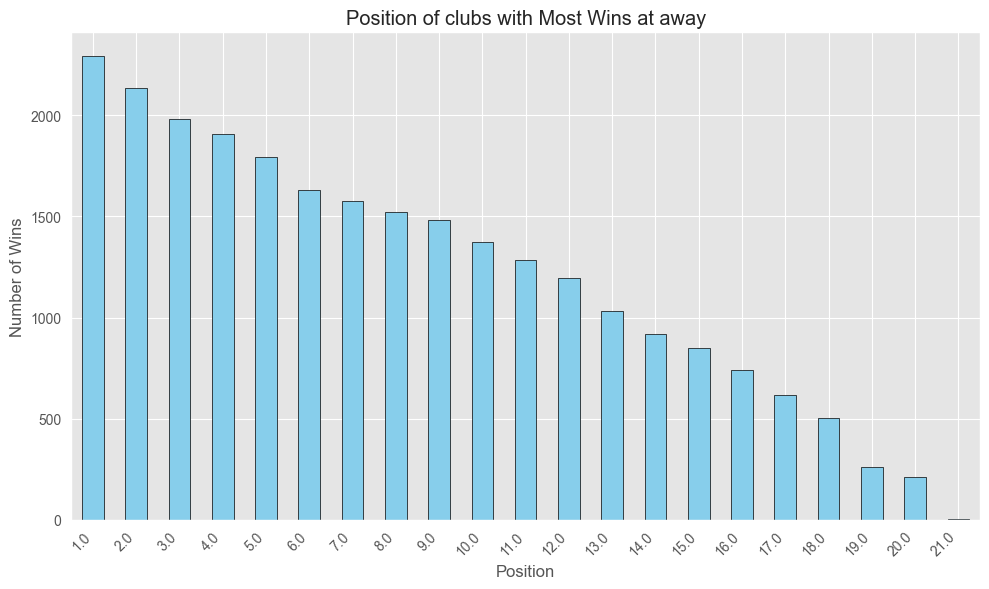

In [104]:
home_wins = club_games_with_position[club_games_with_position['hosting'] == 'Home']
home_wins_count = home_wins[home_wins['is_win'] == 0].groupby('opponent_position').size().sort_values(ascending=False)


home_wins_count.plot(kind='bar',
                     color='skyblue',
                     title ='Position of clubs with Most Wins at away', 
                     figsize = (10,6),
                     xlabel = 'Position',
                     ylabel ='Number of Wins',
                     edgecolor='black')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()

<Axes: >

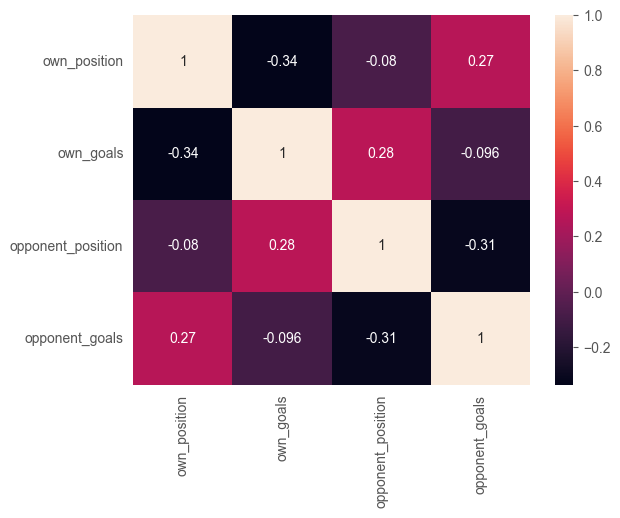

In [101]:
sns.heatmap(club_games_with_position[['own_position','own_goals', 'opponent_position', 'opponent_goals']].corr(), annot=True)

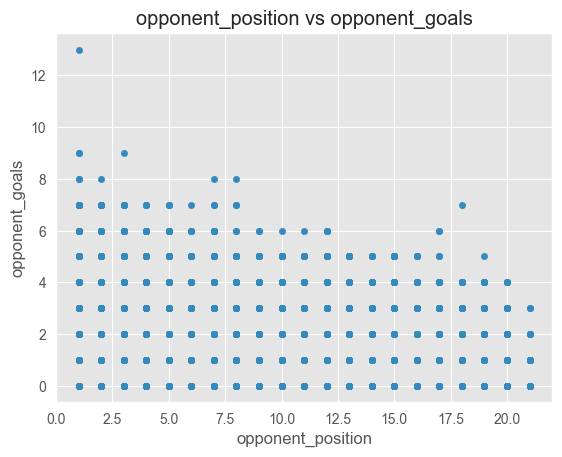

In [105]:
club_games_with_position.plot(kind = 'scatter', 
              x = 'opponent_position', 
              y = 'opponent_goals', 
              title = 'opponent_position vs opponent_goals')
plt.show()  #as we expect, the higher the dosage the less goals they make (20), while if it is low they will make more goals(1)

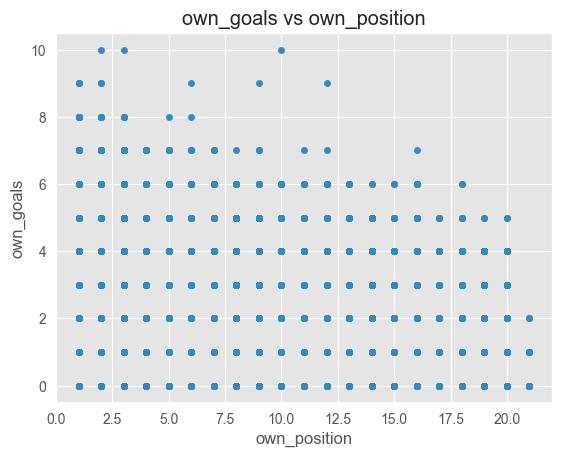

In [107]:
club_games_with_position.plot(kind = 'scatter', 
              x = 'own_position', 
              y = 'own_goals',
              title = 'own_goals vs own_position')
plt.show() 

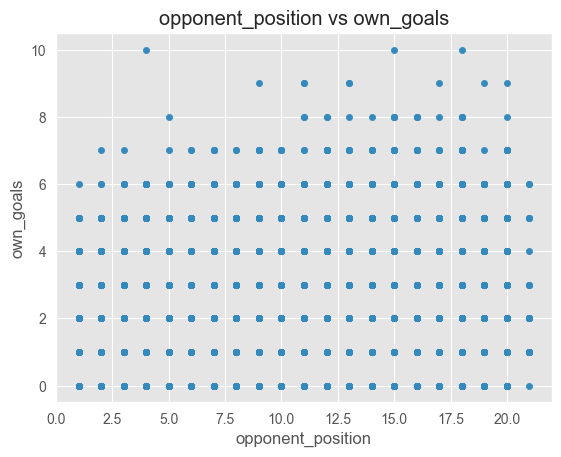

In [109]:
club_games_with_position.plot(kind = 'scatter', 
              x = 'opponent_position',
              y = 'own_goals', 
              title = 'opponent_position vs own_goals')
plt.show() 